# Stochastic Calculus

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys
sys.path.append('/Users/gusamarante/PycharmProjects/QuantFin')

## Symmetric Random Walk


In [23]:
n = 100  # time-series length
k = 10000  # number os simulated trajectories


np.random.seed(666)

time_index = np.arange(n + 1)

# "flip the coins"
omega = np.random.uniform(size=(n, k))

# get increments
X = (omega >= 0.5) * 1 + (omega < 0.5) * (-1)

# Sum the increments (integration)
M = X.cumsum(axis=0)

# add a zero as a starting point
M = np.vstack([np.zeros((1, k)), M])

column_names = [f'SRW {i+1}' for i in range(k)]
simulated_trajectories = pd.DataFrame(index=time_index,
                                      data=M,
                                      columns=column_names)

simulated_trajectories

,SRW 1,SRW 2,SRW 3,SRW 4,SRW 5,SRW 6,SRW 7,SRW 8,SRW 9,SRW 10,...,SRW 9991,SRW 9992,SRW 9993,SRW 9994,SRW 9995,SRW 9996,SRW 9997,SRW 9998,SRW 9999,SRW 10000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
2,2.0,0.0,2.0,0.0,0.0,0.0,-2.0,0.0,-2.0,0.0,...,0.0,0.0,0.0,-2.0,2.0,0.0,2.0,0.0,-2.0,-2.0
3,3.0,-1.0,3.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,1.0,-1.0,3.0,1.0,-1.0,-3.0
4,4.0,0.0,4.0,0.0,2.0,2.0,-2.0,2.0,-2.0,0.0,...,0.0,2.0,-2.0,0.0,2.0,-2.0,2.0,0.0,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-4.0,-8.0,8.0,6.0,-2.0,-2.0,4.0,-12.0,0.0,18.0,...,-14.0,12.0,4.0,0.0,6.0,-12.0,-6.0,-22.0,2.0,12.0
97,-5.0,-7.0,9.0,7.0,-1.0,-1.0,3.0,-13.0,1.0,17.0,...,-13.0,13.0,3.0,1.0,7.0,-11.0,-5.0,-21.0,1.0,13.0
98,-6.0,-8.0,8.0,8.0,0.0,-2.0,2.0,-12.0,0.0,18.0,...,-12.0,14.0,2.0,0.0,6.0,-12.0,-6.0,-22.0,2.0,14.0
99,-5.0,-7.0,7.0,9.0,-1.0,-3.0,1.0,-11.0,-1.0,17.0,...,-11.0,15.0,1.0,-1.0,7.0,-11.0,-5.0,-21.0,1.0,13.0


In [ ]:
simulated_trajectories.plot(figsize=(12, 9), legend=None)
plt.show()

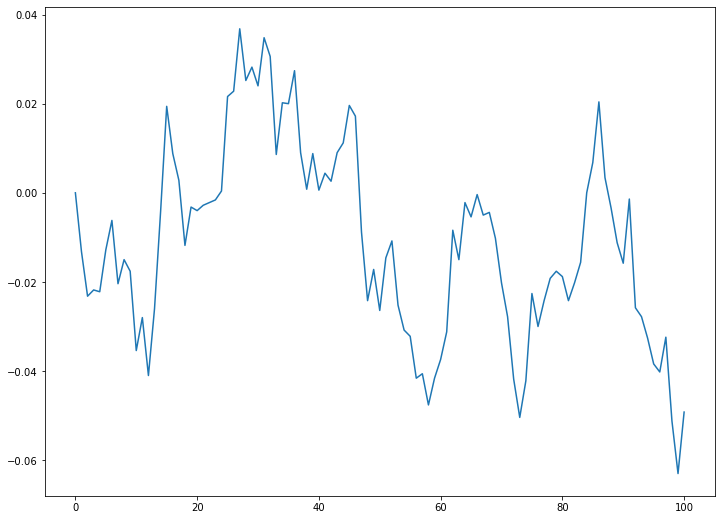

In [24]:
simulated_trajectories.mean(axis=1).plot(figsize=(12, 9), legend=None)
plt.show()

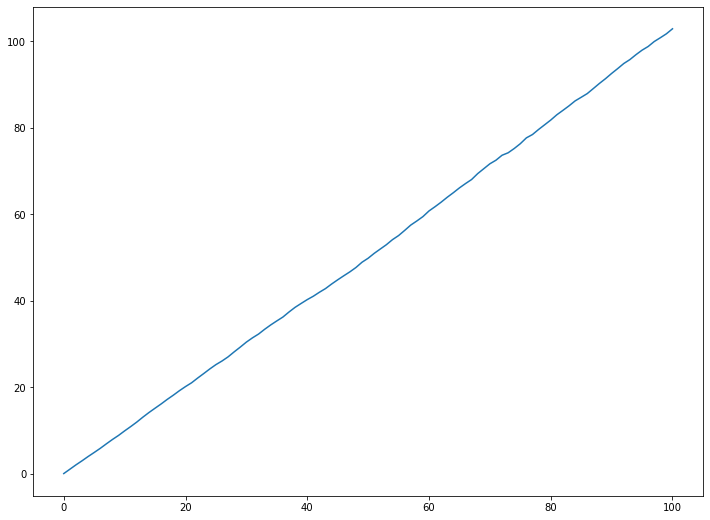

In [25]:
simulated_trajectories.var(axis=1).plot(figsize=(12, 9), legend=None)
plt.show()

## Accumulated Quadratic Variation

In [28]:
(simulated_trajectories.diff(1) ** 2).sum()

SRW 1        100.0
SRW 2        100.0
SRW 3        100.0
SRW 4        100.0
SRW 5        100.0
             ...  
SRW 9996     100.0
SRW 9997     100.0
SRW 9998     100.0
SRW 9999     100.0
SRW 10000    100.0
Length: 10000, dtype: float64

---
# Scaled Symmetric Random Walk

In [29]:
def BrownianMotion(T, n, k=1, random_seed=None):
    """
    Simulates the scaled random walk that leads to the brownian motion.
    :param T: number of years in the simulation
    :param n: number of steps in the simulated trajectories
    :param k: number of trajectories to simulate
    :param random_seed: random seed for numpy's RNG
    """

    if random_seed is not None:
        np.random.seed(random_seed)

    time_index = np.arange(n * T + 1) / n

    # Scaled Random Walk
    omega = np.random.uniform(size=(T * n, k))  # "flip the coins"
    X = (omega >= 0.5) * 1 + (omega < 0.5) * (-1)  # get the increments
    M = X.cumsum(axis=0)  # Sum the increments (integration)
    M = (1 / np.sqrt(n)) * M  # Scale the process
    M = np.vstack([np.zeros((1, k)), M])  # add a zero as a starting point

    column_names = [f'Brownian Motion {i+1}' for i in range(k)]
    simulated_trajectories = pd.DataFrame(index=time_index,
                                          data=M,
                                          columns=column_names)
    return simulated_trajectories

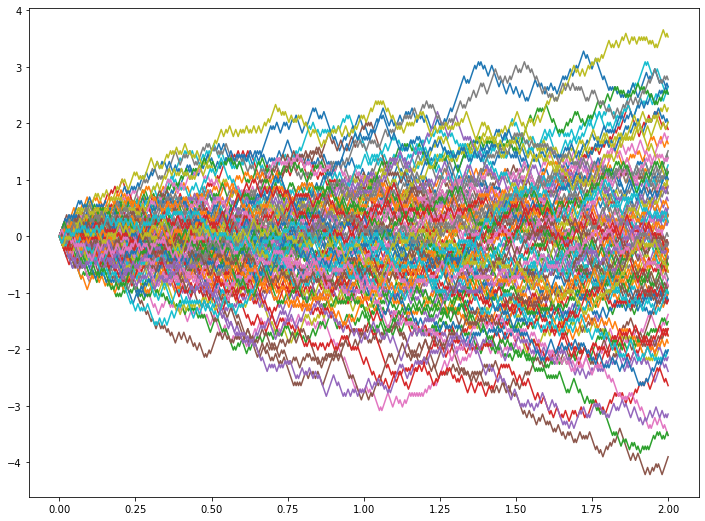

In [35]:
dfbm = BrownianMotion(T=2, n=252, k=100, random_seed=666)

dfbm.plot(figsize=(12, 9), legend=None)
plt.show()

---
# Geometric Brownian Motion
you can find the `Diffusion` class on my [github library](https://github.com/gusamarante/QuantFin/blob/master/quantfin/simulation/diffusion.py)

In [44]:
from quantfin.simulation import Diffusion

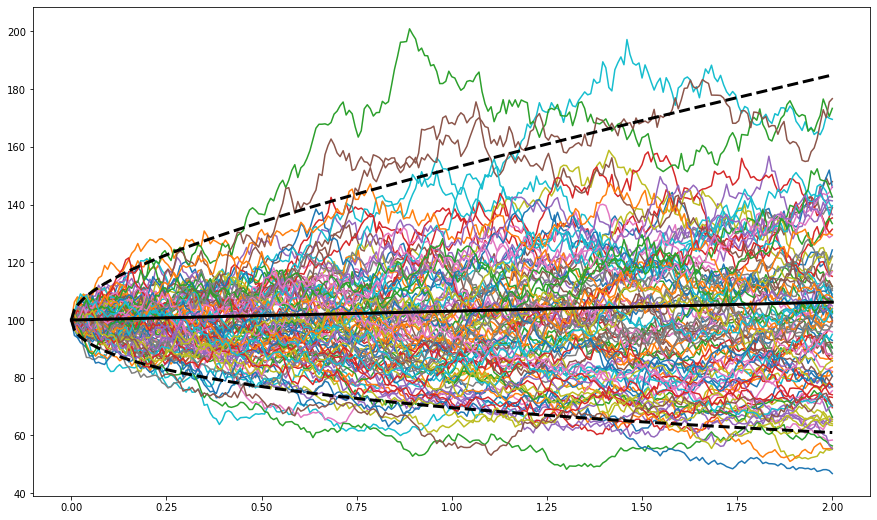

In [51]:
diff = Diffusion(T=2, n=252, k=100, initial_price=100, 
                 process_type='gbm', drift=0.03, diffusion=0.2, random_seed=666,  conf=0.95)

diff.simulated_trajectories.plot(legend=None, figsize=(15, 9))
diff.theoretical_mean.plot(legend=None, color='black', linewidth=3)
diff.ci_lower.plot(legend=None, color='black', linewidth=3, linestyle='--')
diff.ci_upper.plot(legend=None, color='black', linewidth=3, linestyle='--')
plt.show()

<AxesSubplot:>

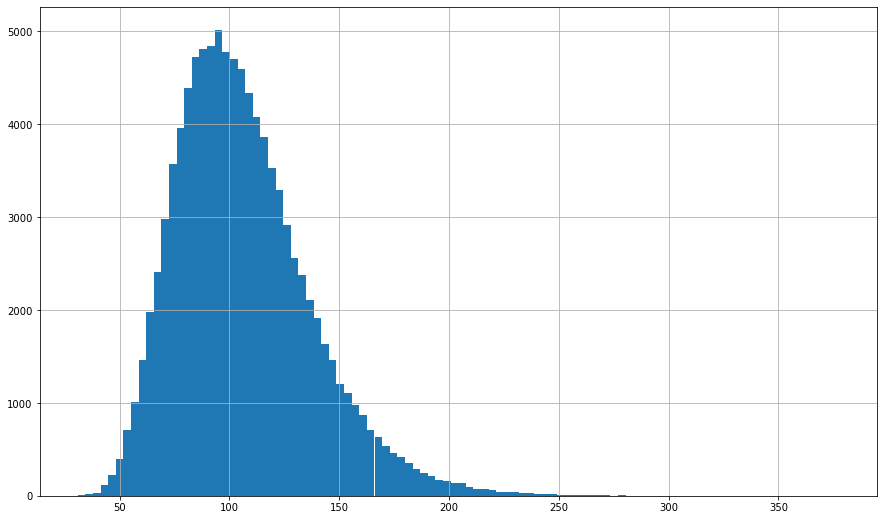

In [57]:
diff = Diffusion(T=2, n=252, k=100000, initial_price=100, 
                 process_type='gbm', drift=0.03, diffusion=0.2, random_seed=666,  conf=0.95)

diff.simulated_trajectories.iloc[-1].hist(figsize=(15, 9), bins=100)

---
# Option Pricing

In [58]:
from quantfin.options import BlackScholes

In [64]:
bs = BlackScholes(stock_price=100, 
                  strike_price=120, 
                  maturity=1, 
                  risk_free=0.03, 
                  vol=0.2, 
                  div_yield=0, 
                  call=True,
                  option_type='european')

print('The price is', bs.price)
print('The delta is', bs.delta)
print('The gamma is', bs.gamma)
print('The rho is', bs.rho)
print('The theta is', bs.theta)
print('The vega is', bs.vega)

The price is 2.7665576398914276
The delta is 0.25411130882605876
The gamma is 0.01602615447476389
The rho is 22.644573242714447
The theta is -3.8845680922342107
The vega is 32.05230894952778


In [65]:
bs = BlackScholes.from_price(stock_price=100, 
                             strike_price=120, 
                             maturity=1, 
                             risk_free=0.03, 
                             option_price=2.766, 
                             div_yield=0, 
                             call=True,
                             option_type='european')

print('The price is', bs.price)
print('The delta is', bs.delta)
print('The gamma is', bs.gamma)
print('The rho is', bs.rho)
print('The theta is', bs.theta)
print('The vega is', bs.vega)

The price is 2.766000000000002
The delta is 0.2540872836350876
The gamma is 0.01602675385351294
The rho is 22.642728363508756
The theta is -3.884074971288794
The vega is 32.05071933414865


---
# Price Options with Simulations

In [71]:
# Parameters
S0 = 100
E = 100
Sb = 130
r = 0.04
q = 0
sigma = 0.2
T = 1

n_simul = 100000

### Analytical Price

In [72]:
d1 = (np.log(S0 / E) + (r - q + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
d2 = (np.log(S0 / E) + (r - q - 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
d3 = (np.log(S0 / Sb) + (r - q + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
d4 = (np.log(S0 / Sb) + (r - q - 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
d5 = (np.log(S0 / Sb) - (r - q - 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
d6 = (np.log(S0 / Sb) - (r - q + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
d7 = (np.log(S0 * E / (Sb ** 2)) - (r - q - 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
d8 = (np.log(S0 * E / (Sb ** 2)) - (r - q + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
a = (Sb / S0) ** (2 * (r - q) / (sigma ** 2) - 1)
b = (Sb / S0) ** (2 * (r - q) / (sigma ** 2) + 1)

nd1 = norm.cdf(d1)
nd2 = norm.cdf(d2)
nd3 = norm.cdf(d3)
nd4 = norm.cdf(d4)
nd5 = norm.cdf(d5)
nd6 = norm.cdf(d6)
nd7 = norm.cdf(d7)
nd8 = norm.cdf(d8)

vanilla_price = - E * np.exp(-r * T) * nd2 + S0 * np.exp(-q * T) * nd1

barrier_price = S0 * np.exp(-q * T) * (nd1 - nd3 - b * (nd6 - nd8)) \
              - E * np.exp(-r * T) * (nd2 - nd4 - a * (nd5 - nd7))

print('vanilla analytical price', vanilla_price)
print('barrier analytical price', barrier_price)

vanilla analytical price 9.925053717274437
barrier analytical price 3.270902274968673


### Simulated Price

In [79]:
delta_t = 1 / (252 * T)
returns = np.random.normal((r - 0.5*sigma**2)*delta_t, sigma*np.sqrt(delta_t), (252*T, n_simul))
returns = np.cumsum(returns, axis=0)
simulated_trajectories = S0 * np.exp(returns)

vanilla_simul = np.mean(np.maximum(simulated_trajectories[-1] - E, 0)) * np.exp(-r*T)

live_options = simulated_trajectories.max(axis=0) < Sb
barrier_simul = np.mean(live_options * np.maximum(simulated_trajectories[-1] - E, 0)) * np.exp(-r*T)

print('vanilla simulated price', vanilla_simul)
print('barrier simulated price', barrier_simul)

vanilla simulated price 9.922169947311554
barrier simulated price 3.4925899228033117
